In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#IMPORTING THE DATASET
data=pd.read_csv('Direct_Taxes.csv')

In [4]:
#DATA EXPLORATION AND VISUALISATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Financial_Year  22 non-null     int64
 1   Direct_Taxes    22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [5]:
data.describe()

,Financial_Year,Direct_Taxes
count,22.000000,2.200000e+01
mean,2010.500000,5.389005e+05
std,6.493587,3.967187e+05
min,2000.000000,6.830500e+04
25%,2005.250000,1.814572e+05
50%,2010.500000,4.699910e+05
75%,2015.750000,8.227710e+05
max,2021.000000,1.412422e+06


<AxesSubplot:>

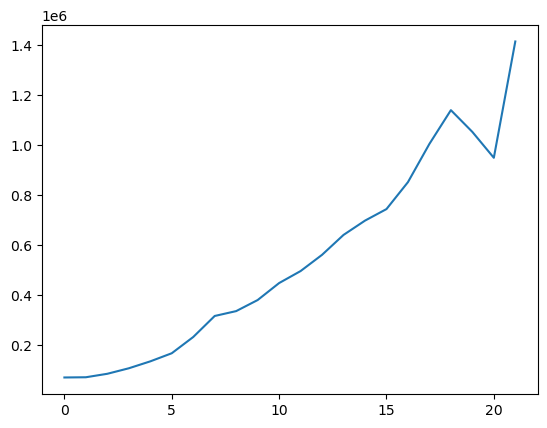

In [6]:
data_DT=data['Direct_Taxes']
data_DT.plot()

In [7]:
#TEST-TRAIN SPLIT
msk=(data.index<len(data)-5)
data_train=data[msk].copy()
data_test=data[~msk].copy()
DT_Train=data_train['Direct_Taxes']

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


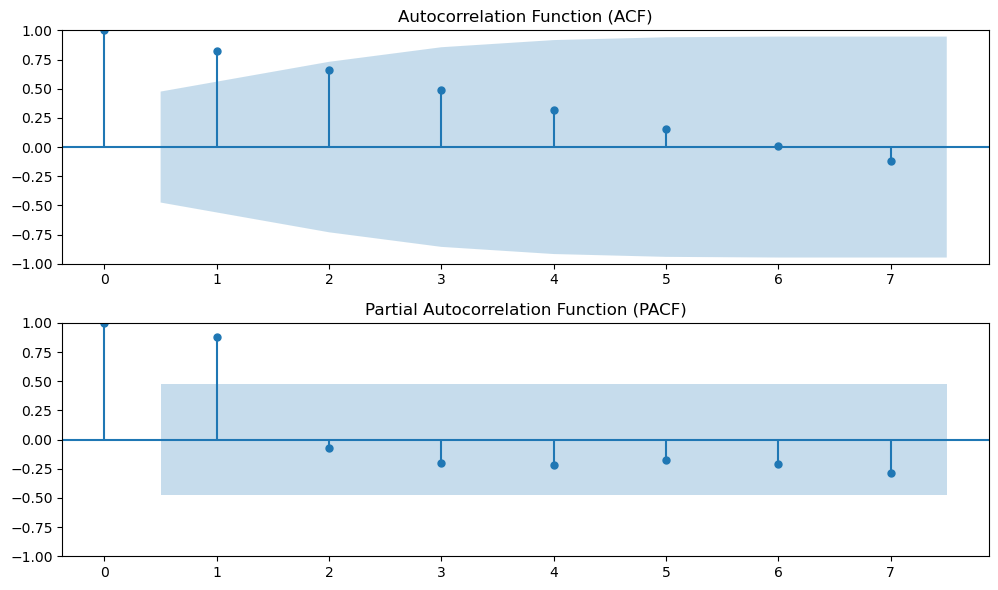

In [8]:
#CHECKING STATIONARITY OF THE TRAIN DATASET
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots for the "Other Direct Taxes" series
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# ACF Plot
plot_acf(DT_Train, lags=7, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF Plot
plot_pacf(DT_Train, lags=7, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [10]:
#PERFORMING THE ADF TEST
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on "Other Direct Taxes"
adf_test = adfuller(DT_Train)

# Print the ADF test results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

ADF Statistic: 2.290895090173342
p-value: 0.998949326662633
Critical Values:
1%: -4.223238279489106
5%: -3.189368925619835
10%: -2.729839421487603


<AxesSubplot:>

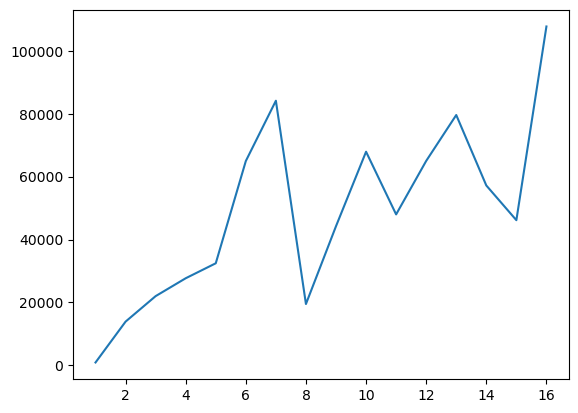

In [11]:
#DIFFERENCING TO MAKE THE DATA STATIONARY
data_train_diff = DT_Train.diff().dropna()
data_train_diff.plot()

In [12]:
adf_test = adfuller(data_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.9621970274436344


<AxesSubplot:>

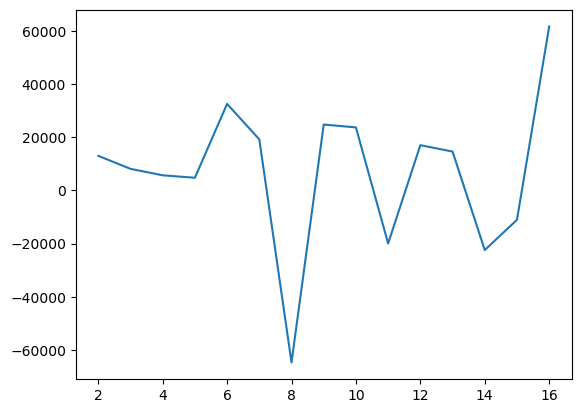

In [13]:
data_train_diff2 = data_train_diff.diff().dropna()
data_train_diff2.plot()

In [14]:
adf_test = adfuller(data_train_diff2)
print(f'p-value: {adf_test[1]}')

p-value: 0.0005945542224479642


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


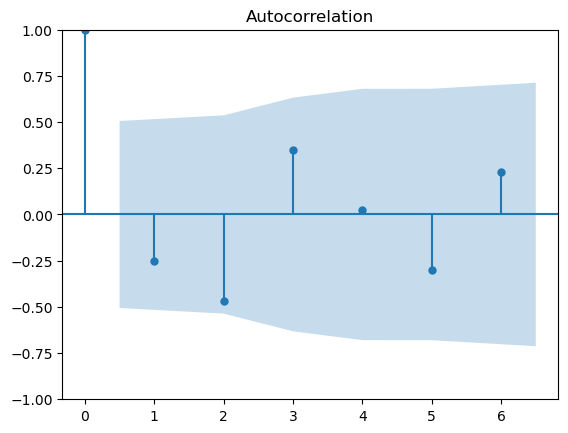

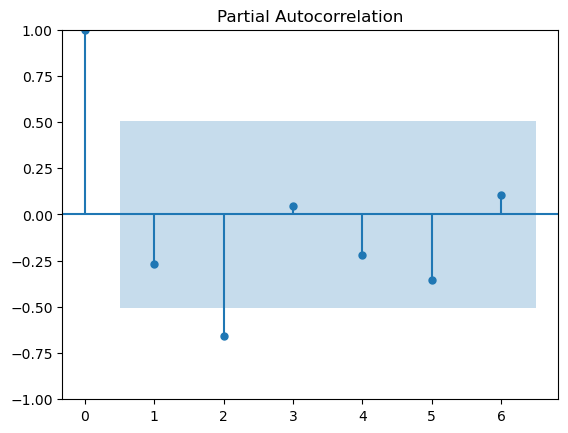

In [15]:
acf_diff = plot_acf(data_train_diff2, lags=6)
pacf_diff = plot_pacf(data_train_diff2, lags=6)

In [31]:
#ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(DT_Train, order=(3,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Direct_Taxes   No. Observations:                   17
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -173.442
Date:                Fri, 06 Oct 2023   AIC                            358.883
Time:                        23:42:37   BIC                            363.132
Sample:                             0   HQIC                           358.838
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1850     10.299     -0.018      0.986     -20.371      20.001
ar.L2         -0.3325      4.344     -0.077      0.939      -8.847       8.182
ar.L3          0.1199      4.796      0.025      0.9

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


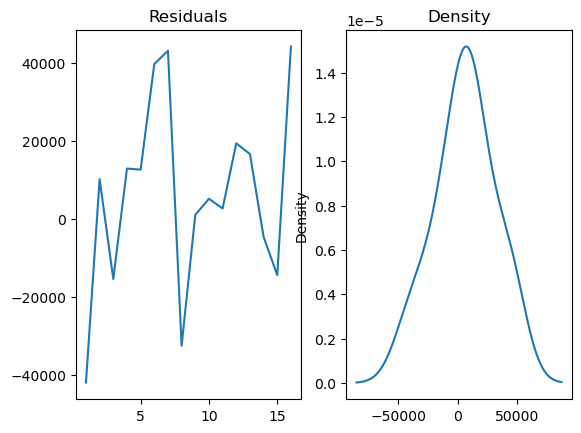

In [32]:
#RESIDUAL ANALYSIS
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


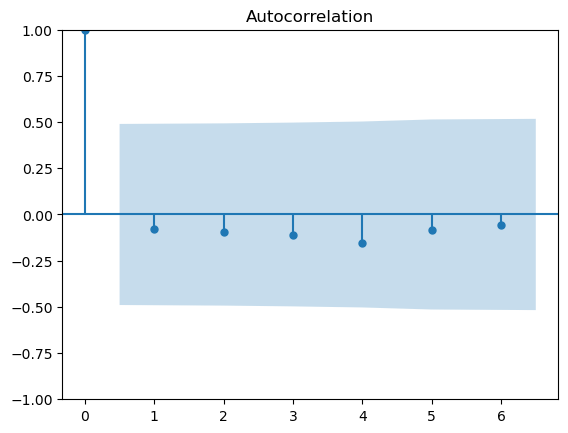

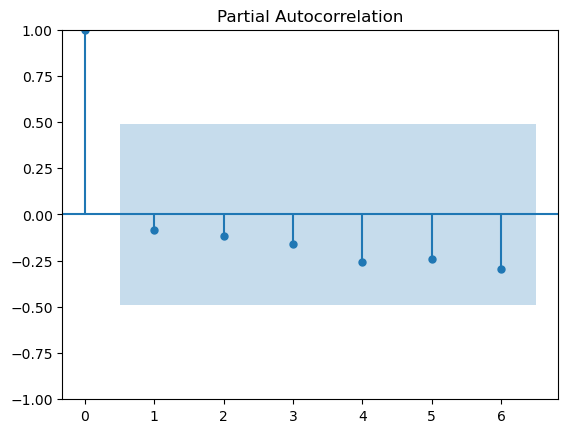

In [33]:
acf_res = plot_acf(residuals,lags=6)
pacf_res = plot_pacf(residuals,lags=6)

In [37]:
#FORECASTING
forecast_test = model_fit.forecast(len(data_test))
print(forecast_test)

17    9.279712e+05
18    9.901654e+05
19    1.072531e+06
20    1.152967e+06
21    1.225128e+06
Name: predicted_mean, dtype: float64
